In [6]:
#  upload the file from your local PC to the Colab VM
from google.colab import files
uploaded = files.upload()


Saving Telco_customer_churn.xlsx to Telco_customer_churn (2).xlsx


In [7]:
import pandas as pd

data = pd.read_excel("Telco_customer_churn.xlsx")

# Display basic info
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Problem Framing

**Business Objectives:**

*   Identify customers at high risk of churning.
*   Develop targeted retention strategies for at-risk customers.
*   Reduce customer churn rate.

**Success Metrics:**

*   Achieve a churn prediction accuracy of 80% or higher.
*   Implement retention programs that lead to a 10% reduction in the churn rate within 6 months.
*   Increase customer lifetime value (CLTV) for retained customers.

Shape of Dataset: (7043, 33)

Columns:
 Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Missing Values:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Ser

/tmp/ipython-input-4098155195.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=data, palette='coolwarm')


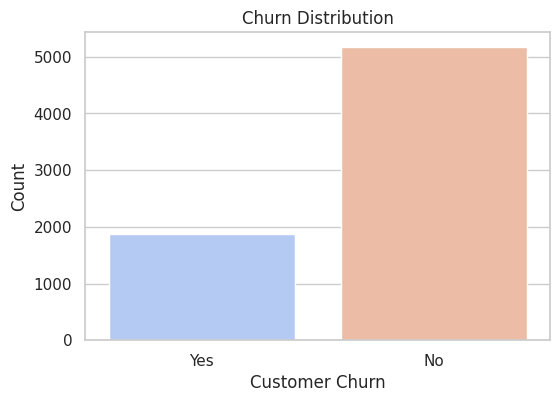

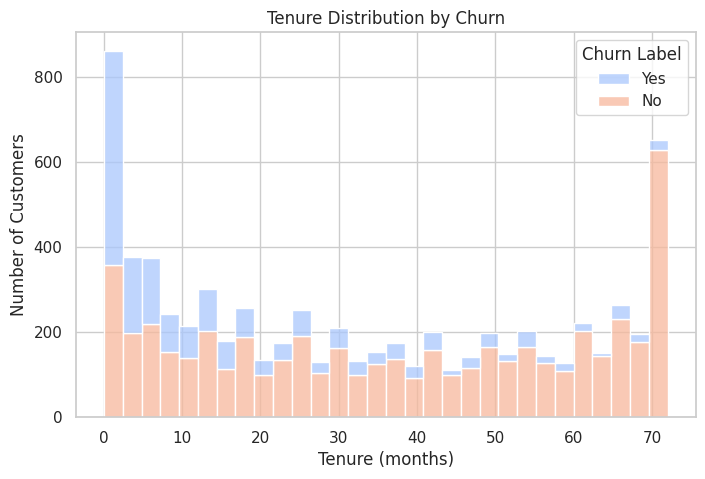

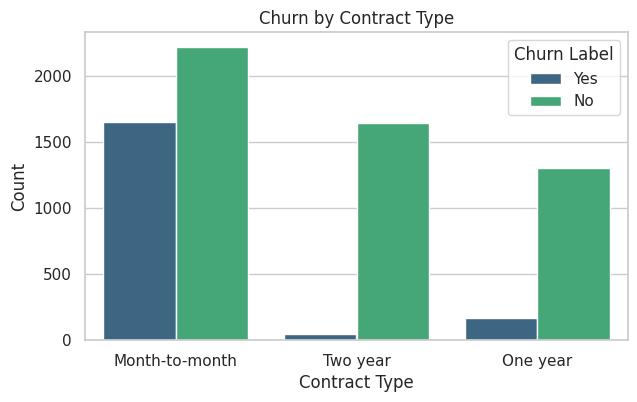

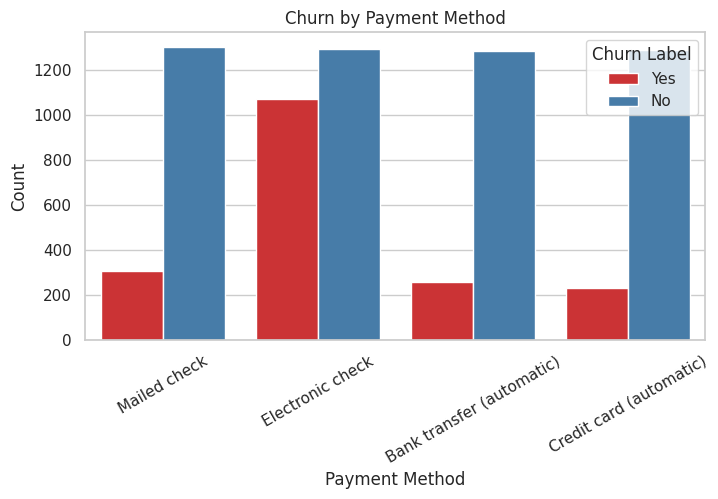

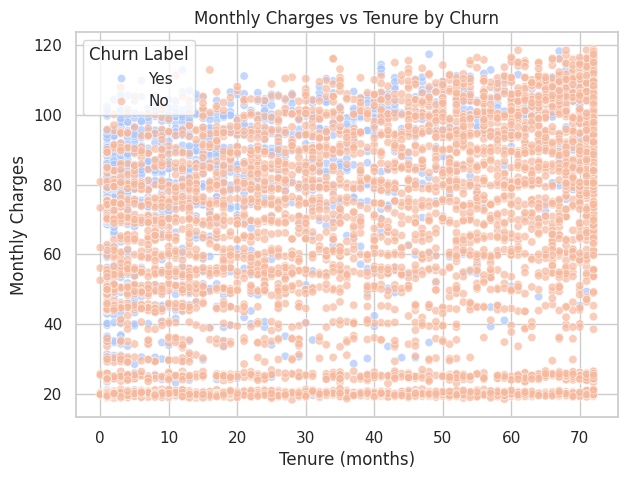

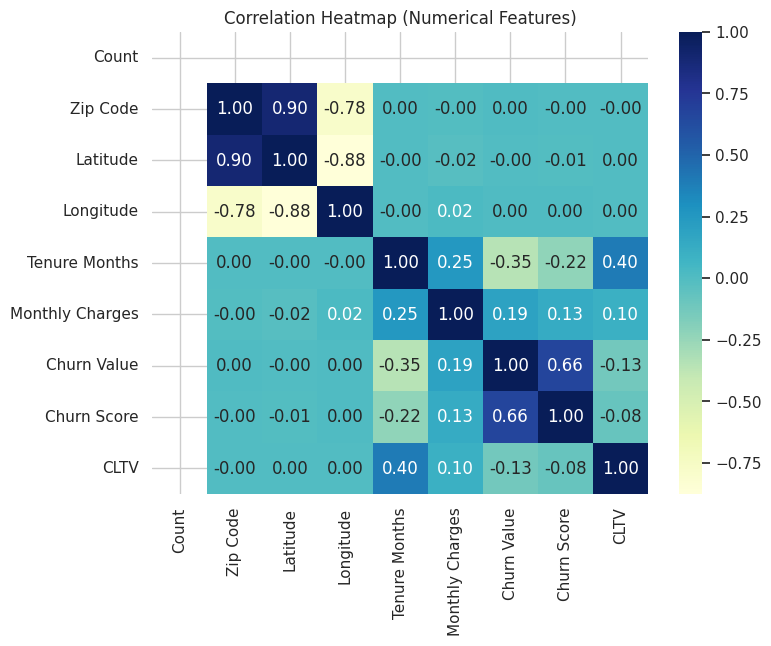

In [13]:
# ==== Import Libraries ====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="Set2")

# ==== 1. Basic Dataset Info ====
print("Shape of Dataset:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())

# ==== 2. Distribution of Target Variable (Churn) ====
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', data=data, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Customer Churn')
plt.ylabel('Count')
plt.show()

# ==== 3. Tenure Distribution by Churn ====
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Tenure Months', hue='Churn Label', multiple='stack', kde=False, palette='coolwarm', bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

# ==== 4. Churn Rate by Contract Type ====
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn Label', data=data, palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# ==== 5. Churn Rate by Payment Method ====
plt.figure(figsize=(8,4))
sns.countplot(x='Payment Method', hue='Churn Label', data=data, palette='Set1')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

# ==== 6. Monthly Charges vs Tenure (colored by Churn) ====
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='Tenure Months', y='Monthly Charges', hue='Churn Label', alpha=0.7, palette='coolwarm')
plt.title('Monthly Charges vs Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

# ==== 7. Heatmap of Numeric Correlations ====
plt.figure(figsize=(8,6))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

✅ Preprocessing done. Data balanced:
0    4130
1    4130
Name: count, dtype: int64

🔹 Training Logistic Regression ...
✅ Best params for Logistic Regression: {'C': 1}

🔹 Training Decision Tree ...
✅ Best params for Decision Tree: {'max_depth': None, 'min_samples_split': 5}

🔹 Training Random Forest ...
✅ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

🔹 Training Gradient Boosting ...
✅ Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

🔹 Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:46:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


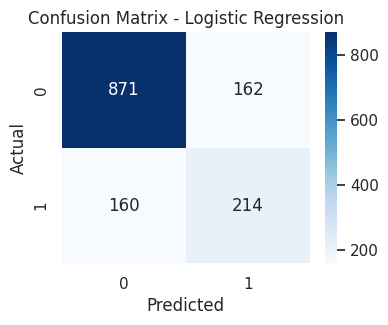

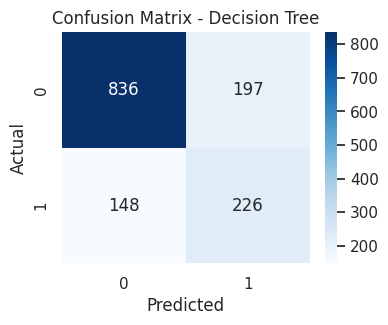

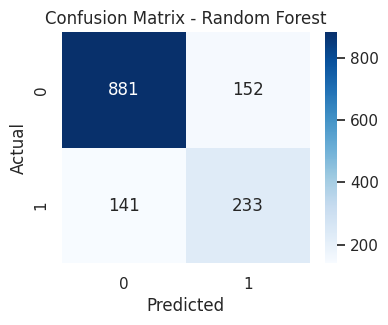

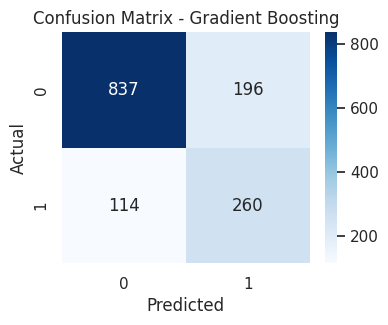

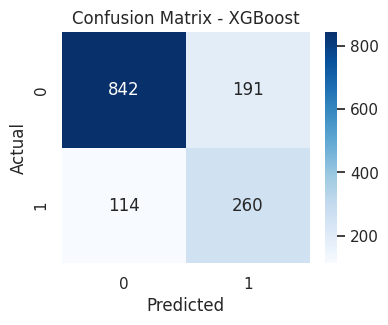


📊 Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
2        Random Forest    0.7918     0.6052  0.6230    0.6140   0.8367
4              XGBoost    0.7832     0.5765  0.6952    0.6303   0.8438
3    Gradient Boosting    0.7797     0.5702  0.6952    0.6265   0.8470
0  Logistic Regression    0.7711     0.5691  0.5722    0.5707   0.8145
1        Decision Tree    0.7548     0.5343  0.6043    0.5671   0.7116


In [26]:
# ===========================================
# TELCO CUSTOMER CHURN PROJECT
# Fixed version to prevent data leakage
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================================
# 1️⃣ LOAD AND CLEAN DATA
# ===========================================
df = pd.read_excel("Telco_customer_churn.xlsx")

# Drop identifier if exists
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)

# Drop 'Churn Reason' column due to many missing values
if 'Churn Reason' in df.columns:
    df.drop('Churn Reason', axis=1, inplace=True)

# Convert TotalCharges to numeric safely
if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Target column (make sure it’s Yes/No or 1/0)
target_col = "Churn Label"
y = df[target_col]
X = df.drop(columns=[target_col])


# Remove any accidentally encoded churn-related columns
X = X.loc[:, ~X.columns.str.contains("Churn", case=False)]

# ===========================================
# 3️⃣ ENCODING + SCALING + BALANCING
# ===========================================
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Balance dataset with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("✅ Preprocessing done. Data balanced:")
print(pd.Series(y_train_res).value_counts())

# ===========================================
# 4️⃣ MODEL DEVELOPMENT + HYPERPARAMETER TUNING
# ===========================================
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000),
                            {'C': [0.1, 1, 10]}),

    "Decision Tree": (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [3, 5, 10, None],
                       'min_samples_split': [2, 5, 10]}),

    "Random Forest": (RandomForestClassifier(random_state=42),
                      {'n_estimators': [100, 200],
                       'max_depth': [5, 10, None],
                       'min_samples_split': [2, 5]}),

    "Gradient Boosting": (GradientBoostingClassifier(random_state=42),
                          {'n_estimators': [100, 200],
                           'learning_rate': [0.05, 0.1],
                           'max_depth': [3, 5]}),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                {'n_estimators': [100, 200],
                 'learning_rate': [0.05, 0.1],
                 'max_depth': [3, 5, 7]})
}

best_models = {}

for name, (model, params) in models.items():
    print(f"\n🔹 Training {name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_models[name] = grid.best_estimator_
    print(f"✅ Best params for {name}: {grid.best_params_}")

# ===========================================
# 5️⃣ EVALUATION
# ===========================================
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final Results
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df.round(4).sort_values(by='Accuracy', ascending=False))


🏆 Best Model Selected for Feature Importance: Random Forest


/tmp/ipython-input-9108308.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')


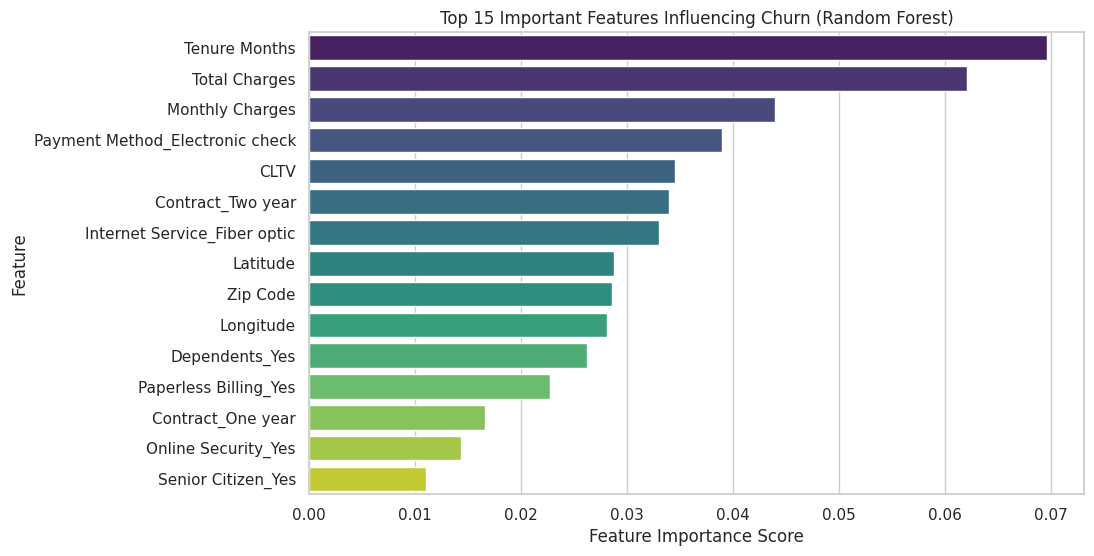


📊 Top 10 Features that influence churn:
                        Feature  Importance
                  Tenure Months    0.069663
                  Total Charges    0.062077
                Monthly Charges    0.044014
Payment Method_Electronic check    0.039012
                           CLTV    0.034572
              Contract_Two year    0.033989
   Internet Service_Fiber optic    0.032988
                       Latitude    0.028739
                       Zip Code    0.028592
                      Longitude    0.028116


In [27]:
# ===========================================
# 6️⃣ FEATURE IMPORTANCE ANALYSIS
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pick the best-performing model based on accuracy
best_model_name = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model = best_models[best_model_name]

print(f"\n🏆 Best Model Selected for Feature Importance: {best_model_name}")

# Check if model provides feature importance attribute
if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Display Top 15 Features
    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
    plt.title(f"Top 15 Important Features Influencing Churn ({best_model_name})")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.show()

    print("\n📊 Top 10 Features that influence churn:")
    print(feature_importance.head(10).to_string(index=False))

else:
    print(f"The selected model ({best_model_name}) does not support feature_importances_ attribute.")


In [30]:
# ===========================================
# 7️⃣ DEPLOYMENT PIPELINE: CHURN PREDICTION
# ===========================================
import joblib
import numpy as np
import pandas as pd

# Save the best model, scaler, and column names for deployment
joblib.dump(best_model, "best_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

print("\n💾 Model, scaler, and feature list saved successfully!")

# ===========================================
# FUNCTION: Preprocess new data + Predict churn
# ===========================================

def churn_prediction_pipeline(new_data_path):
    """
    Pipeline to load new customer data, preprocess it, and flag high churn risk customers.
    """
    # Load saved components
    model = joblib.load("best_churn_model.pkl")
    scaler = joblib.load("scaler.pkl")
    feature_cols = joblib.load("feature_columns.pkl")

    # Read new customer data
    new_df = pd.read_excel(new_data_path)
    original_df = new_df.copy()

    # --- Preprocessing identical to training ---
    if 'customerID' in new_df.columns:
        new_df.drop('customerID', axis=1, inplace=True)

    if 'TotalCharges' in new_df.columns:
        new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')

    new_df.fillna(0, inplace=True)

    # Encode categorical variables
    new_df = pd.get_dummies(new_df, drop_first=True)

    # Align columns with training data
    new_df = new_df.reindex(columns=feature_cols, fill_value=0)

    # Scale numeric features
    num_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
    new_df[num_cols] = scaler.transform(new_df[num_cols])

    # --- Prediction ---
    churn_proba = model.predict_proba(new_df)[:, 1]  # probability of churn
    churn_pred = (churn_proba >= 0.5).astype(int)    # flag high risk

    # --- Combine results ---
    output = original_df.copy()
    output["Churn_Probability"] = churn_proba
    output["Churn_Predicted"] = np.where(churn_pred == 1, "High Risk", "Low Risk")

    # Sort by highest churn risk
    output_sorted = output.sort_values(by="Churn_Probability", ascending=False)

    print("\n✅ Churn prediction completed. Top high-risk customers:")
    print(output_sorted.head(10)[["Churn_Probability", "Churn_Predicted"]])

    return output_sorted


💾 Model, scaler, and feature list saved successfully!


## Business Recommendations

Based on the analysis and the identified key features influencing churn, here are some actionable business recommendations:

1.  **Focus on Short-Tenure Customers:** Customers with shorter tenure have a higher churn rate. Implement targeted strategies to engage and retain new customers during their initial months. This could include:
    *   **Enhanced Onboarding:** Provide excellent support and resources during the first few months to ensure customers are successfully using the service.
    *   **Early Intervention:** Monitor the activity and satisfaction of new customers and proactively reach out if they show signs of disengagement or dissatisfaction.
    *   **Welcome Offers/Discounts:** Offer incentives or discounts to new customers to encourage them to stay beyond the initial period.

2.  **Improve Support Quality and Accessibility:** Features related to tech support and online security were identified as important. Improving the quality and accessibility of customer support can significantly impact retention.
    *   **24/7 Support:** Offer around-the-clock support through various channels (phone, chat, email).
    *   **Faster Resolution Times:** Streamline support processes to reduce the time it takes to resolve customer issues.
    *   **Proactive Support:** Use the churn prediction model to identify high-risk customers and offer proactive support or check-ins.

3.  **Promote Long-Term Contracts:** Customers on month-to-month contracts have a higher churn rate. Incentivizing customers to switch to longer-term contracts (one-year or two-year) can improve retention.
    *   **Discounted Rates:** Offer significant discounts for customers who sign up for longer contracts.
    *   **Value-Added Services:** Bundle additional services or features for customers who commit to longer terms.
    *   **Clear Communication of Benefits:** Clearly articulate the cost savings and benefits of long-term contracts to customers.

4.  **Optimize Pricing and Billing:** Monthly charges and total charges are important factors.
    *   **Review Pricing Tiers:** Ensure pricing is competitive and perceived as fair value for the services offered.
    *   **Flexible Payment Options:** Offer a variety of convenient payment methods.
    *   **Transparent Billing:** Make sure bills are easy to understand and avoid unexpected charges.

5.  **Leverage Electronic Payment Methods:** Electronic check was identified as a payment method associated with higher churn.
    *   **Encourage Automatic Payments:** Promote and incentivize automatic payment methods like bank transfers or credit cards.
    *   **Investigate Issues with Electronic Check:** Understand why customers using electronic checks might be churning more and address any underlying issues.

6.  **Personalize Offers and Communications:** Use the insights from the feature importance to segment customers and tailor retention offers and communications. For example, target customers with high monthly charges or specific internet service types with relevant offers.